# HIV cleavage

***O problema***

Abrir a documentação

***Os dados***

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
data_746_raw = pd.read_csv(r"datasets\newHIV-1_data\746Data.txt", header=None)
data_1625_raw = pd.read_csv(r"datasets\newHIV-1_data\1625Data.txt", header=None)
data_impens_raw = pd.read_csv(r"datasets\newHIV-1_data\impensData.txt", header=None)
data_schilling_raw = pd.read_csv(r"datasets\newHIV-1_data\schillingData.txt", header=None)


In [10]:
data = data_schilling_raw.copy()

***Explore os dados***

In [11]:
data.head()

,0,1
0,AAAAAPAK,-1
1,AAAAPAKV,-1
2,AAAELGAR,-1
3,AAAPAKVE,-1
4,AAAPVAAA,-1


In [12]:
data.shape

(3272, 2)

In [13]:
data.columns = ['Peptide','Cleavage']
data.head()

,Peptide,Cleavage
0,AAAAAPAK,-1
1,AAAAPAKV,-1
2,AAAELGAR,-1
3,AAAPAKVE,-1
4,AAAPVAAA,-1


A coluna *Cleavage* é o *target* e cada letra na coluna *Peptide* é um *feature*. Vamos verficiar se todos os *samples* possuem oito letras:

In [16]:
data['Prot_sum'] = data['Peptide'].apply(len)
print('Número máximo:',max(data['Prot_sum']))
print('Número mínimo:',min(data['Prot_sum']))
print(data.head())

Número máximo: 8
Número mínimo: 8
    Peptide  Cleavage  Prot_sum
0  AAAAAPAK        -1         8
1  AAAAPAKV        -1         8
2  AAAELGAR        -1         8
3  AAAPAKVE        -1         8
4  AAAPVAAA        -1         8


***Prepare os dados para ML***

Devemos fazer duas transformações aqui: aplicar uma técnica chamada OneHotEncoding na coluna *Peptide*; trocar os valores $-1$ de *Cleavage* para zero, tendo a categoria positiva e negativa.

In [17]:
# Separando a string em Peptide em uma coluna para cada proteína
n = max(data['Peptide'].apply(len))
for i in range(n):
    data['Pep0'+str(i)] = data['Peptide'].str[i]

    Peptide  Cleavage  Prot_sum Pep00 Pep01 Pep02 Pep03 Pep04 Pep05 Pep06  \
0  AAAAAPAK        -1         8     A     A     A     A     A     P     A   
1  AAAAPAKV        -1         8     A     A     A     A     P     A     K   
2  AAAELGAR        -1         8     A     A     A     E     L     G     A   
3  AAAPAKVE        -1         8     A     A     A     P     A     K     V   
4  AAAPVAAA        -1         8     A     A     A     P     V     A     A   

  Pep07  
0     K  
1     V  
2     R  
3     E  
4     A  


In [18]:
data.head()

,Peptide,Cleavage,Prot_sum,Pep00,Pep01,Pep02,Pep03,Pep04,Pep05,Pep06,Pep07
0,AAAAAPAK,-1,8,A,A,A,A,A,P,A,K
1,AAAAPAKV,-1,8,A,A,A,A,P,A,K,V
2,AAAELGAR,-1,8,A,A,A,E,L,G,A,R
3,AAAPAKVE,-1,8,A,A,A,P,A,K,V,E
4,AAAPVAAA,-1,8,A,A,A,P,V,A,A,A


In [19]:
data_enc = pd.get_dummies(data)

In [32]:
data_enc.head()

Cleavage  Prot_sum  Peptide_AAAAAPAK  Peptide_AAAAPAKV  Peptide_AAAELGAR  \
0        -1         8                 1                 0                 0   
1        -1         8                 0                 1                 0   
2        -1         8                 0                 0                 1   
3        -1         8                 0                 0                 0   
4        -1         8                 0                 0                 0   

   Peptide_AAAPAKVE  Peptide_AAAPVAAA  Peptide_AAAPVVPQ  Peptide_AAATTAAP  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 1                 0                 0                 0   
4                 0                 1                 0                 0   

   Peptide_AADMLGSY  Peptide_AAEIEGAG  Peptide_AAELEMEL  Peptide_AAELVALA  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   Peptide_AAEQGRPP  Peptide_AAEVVHPG  Peptide_AAGAVASY  Peptide_AAGDLAPI  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   Peptide_AAGGDGAE  Peptide_AAGIVGNL  Peptide_AAICAGPT  Peptide_AAKDPSAV  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   Peptide_AALCSEAA  Peptide_AALGGNSS  Peptide_AALIQQAT  Peptide_AAMQDPEV  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   Peptide_AANYQDTI  Peptide_AAPAAAAA  Peptide_AAPAKVEA  Peptide_AAPLPMMP  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   Peptide_AAPVAAAT  Peptide_AAPVVPQA  Peptide_AASMSAFD  Peptide_AASQSFLQ  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   Peptide_AASSSSLE  Peptide_AATEDLWE  Peptide_AATTAAPA  Peptide_AAVAGGAP  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0 

In [33]:
data_enc.shape

(3272, 3434)

In [24]:
data_enc.columns

Index(['Cleavage', 'Prot_sum', 'Peptide_AAAAAPAK', 'Peptide_AAAAPAKV',
       'Peptide_AAAELGAR', 'Peptide_AAAPAKVE', 'Peptide_AAAPVAAA',
       'Peptide_AAAPVVPQ', 'Peptide_AAATTAAP', 'Peptide_AADMLGSY',
       ...
       'Pep07_M', 'Pep07_N', 'Pep07_P', 'Pep07_Q', 'Pep07_R', 'Pep07_S',
       'Pep07_T', 'Pep07_V', 'Pep07_W', 'Pep07_Y'],
      dtype='object', length=3434)

In [22]:
# target feature
y = pd.DataFrame(data['Cleavage'])
y = y.replace(-1,0)

In [36]:
data_features = data_enc.drop(['Cleavage','Prot_sum'],axis=1)

In [26]:
# salvando os dados prontos
# train dataset
data_features.to_csv(r"C:\Users\Ninja\Google Drive\Programs\CursoBio\datasets\newHIV-1_data\schillingData_features.txt")
# target dataset
y.to_csv(r"C:\Users\Ninja\Google Drive\Programs\CursoBio\datasets\newHIV-1_data\schillingData_target.txt")

In [38]:
X = data_features.copy()

***Treine os modelos***

In [28]:
# machine learning libraries
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_predict, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

# metrics
from sklearn.metrics import accuracy_score, log_loss, make_scorer, confusion_matrix, f1_score, precision_score,\
        recall_score, precision_recall_curve, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

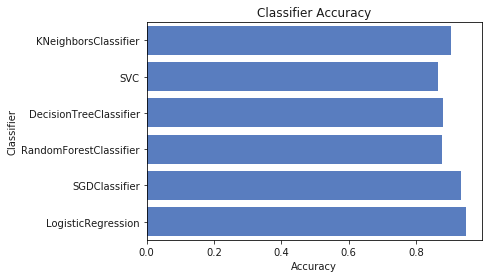

In [40]:
# list of classifiers

classifiers = [
    KNeighborsClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SGDClassifier(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
n_splits=5
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.1, random_state=0)

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / n_splits
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b");

***Melhore os modelos***

In [41]:
# SGDClassifier
sgd = SGDClassifier()
sgd.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [42]:
acc = cross_val_score(sgd,X, y,cv=5,scoring='accuracy')
acc

array([0.86870229, 0.84580153, 0.90534351, 0.92201835, 0.91117917])

In [43]:
y_train_pred = cross_val_predict(sgd,X, y,cv=5)
cm_sgd = confusion_matrix(y,y_train_pred)
f1_sgd = f1_score(y,y_train_pred)
pre_sgd = precision_score(y,y_train_pred)
rec_sgd = recall_score(y,y_train_pred)

In [44]:
print(f1_sgd)
print(pre_sgd)
print(rec_sgd)

[[2695  143]
 [ 164  270]]
0.6375442739079104
0.6537530266343826
0.6221198156682027


In [45]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


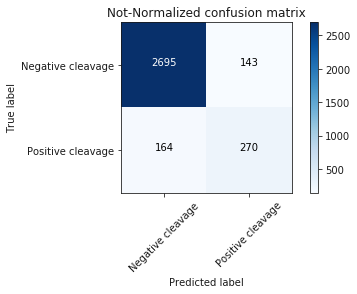

In [46]:
plot_confusion_matrix(cm_sgd,classes=['Negative cleavage','Positive cleavage'],normalize=False,title='Not-Normalized confusion matrix')

In [47]:
y_scores = cross_val_predict(sgd,X, y,cv=5,method='decision_function')

In [48]:
precisions, recalls, thresholds = precision_recall_curve(y,y_train_pred)

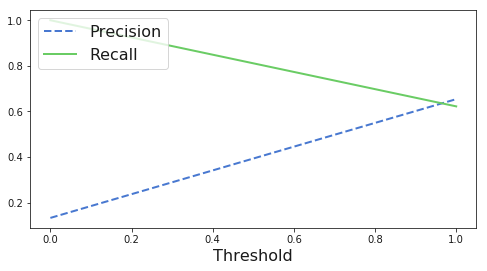

In [49]:
#Plot precision and recall as functions of the threshold value
def  plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

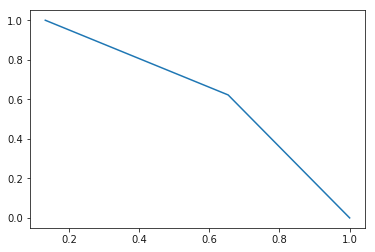

In [50]:
plt.plot(precisions,recalls)
plt.show()

In [51]:
fpr, tpr, thresholds = roc_curve(y,y_scores)

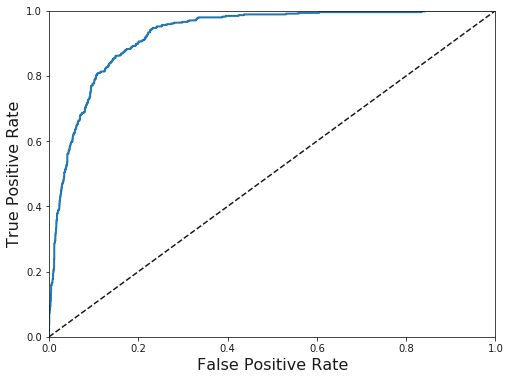

In [52]:
def  plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [53]:
print(roc_auc_score(y,y_scores))

0.9277765870038939


### GridSearch - sgd

In [54]:
sgd

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [66]:
# escolhemos alguns parâmetros para a procura
parameters = {'alpha':[0.00005,0.0001,0.001],'epsilon':[0.01,0.1,1.],'max_iter':[5,10]}

# escolhemos uma métrica
scorer = make_scorer(recall_score)

# rodamos o grid search no training set
grid_obj = GridSearchCV(sgd, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X, y)

# definimos o classificador knn com os melhores parâmetros
sgd = grid_obj.best_estimator_

# e então treinamos o algoritmo com esta combinação
sgd.fit(X, y)

SGDClassifier(alpha=5e-05, average=False, class_weight=None, epsilon=1.0,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [67]:
# recall
predictions = sgd.predict(X)
print(accuracy_score(y, predictions))

0.9712713936430318


In [64]:
# precision
predictions = sgd.predict(X)
print(accuracy_score(y, predictions))

0.9731051344743277


In [68]:
# recall
from sklearn.metrics import classification_report
print(classification_report(y, predictions, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      2838
          1       0.93      0.85      0.89       434

avg / total       0.97      0.97      0.97      3272



In [65]:
# precision
from sklearn.metrics import classification_report
print(classification_report(y, predictions, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      2838
          1       0.93      0.86      0.89       434

avg / total       0.97      0.97      0.97      3272



### GridSearch - log

In [62]:
log = LogisticRegression()
log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
parameters = {'C':[0.1,1.,10.],'max_iter':[100,150]}

scorer = make_scorer(recall_score)

grid_obj = GridSearchCV(log, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X, y)
log = grid_obj.best_estimator_
log.fit(X, y)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
# recall
predictions = log.predict(X)
print(accuracy_score(y, predictions))

0.9990831295843521


In [74]:
# recall
from sklearn.metrics import classification_report
print(classification_report(y, predictions, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2838
          1       1.00      0.99      1.00       434

avg / total       1.00      1.00      1.00      3272



Confusion matrix, without normalization


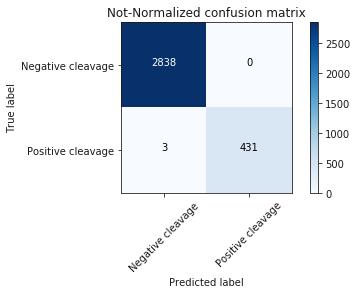

In [75]:
cm_log = confusion_matrix(y,predictions)
plot_confusion_matrix(cm_log,classes=['Negative cleavage','Positive cleavage'],normalize=False,title='Not-Normalized confusion matrix')

***Apresente a solução***